Summary: The most prominent trend observed is that B predicts a lot more often the positive class (>4500 bike shares) than A. The exact reasons depend on month: There is  a high chance for differences for instances of mnth January, February or March, not too low temp values, and mid- to high hum values. Furthermore, for instances of mnth April, mid-range hum. Furthermore, for instances of mnth May upwards, mid- to high temp values, higher hum values and weekday Monday or Tuesday. Furthermore for instances of mnth May upwards, low temp values and not too low windspeed.

In [22]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import get_rules, dt_feature_importance
from tasks.bike_sharing import make_task

XGBoost prints many warnings, that are safe to ignore:

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [3]:
clf_a, clf_b, X, y, feature_names = make_task()

In [4]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

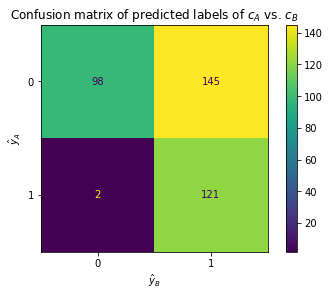

In [5]:
comparer.plot_confusion_matrix(X)

diro2c works with integers only, so I need to scale some features:

In [6]:
scale_features = {'temp': 100, 'windspeed': 100, 'hum': 100, 'atemp': 100}

# Global explanations

## $(0,1)$

In [79]:
focus_class = '(0, 1)'

In [8]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 39min 35s, sys: 1min 45s, total: 41min 21s
Wall time: 11min 11s


In [80]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [81]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [82]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [54]:
feature_importances = dt_feature_importance(tree)
feature_order = np.flip(np.argsort(feature_importances))

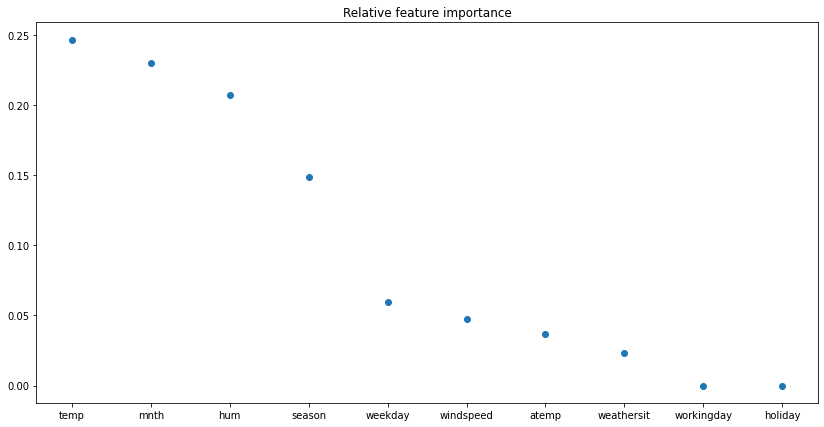

In [55]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

In [56]:
#fig, ax = plt.subplots(figsize=(42, 28))
#plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [57]:
rules = get_rules(tree, feature_names, class_names, focus_class, feature_order)
[print(rule) for rule in rules];

node #28: if (temp > 0.165) and (mnth <= 3.5) and (hum > 0.475) and (season > 1.5) then class: (0, 1) (591/615 instances)
node #56: if (temp > 0.435) and (mnth > 4.5) and (hum > 0.625) and (hum <= 0.755) and (weekday <= 2.5) then class: (0, 1) (358/546 instances)
node #47: if (temp > 0.25) and (temp <= 0.435) and (mnth > 4.5) and (season > 1.5) and (windspeed > 0.195) then class: (0, 1) (249/279 instances)
node #30: if (mnth > 3.5) and (mnth <= 4.5) and (hum > 0.475) and (hum <= 0.55) and (season > 1.5) then class: (0, 1) (218/261 instances)
node #46: if (temp <= 0.25) and (mnth > 4.5) and (season > 1.5) and (windspeed > 0.195) then class: (0, 1) (126/222 instances)
node #27: if (temp <= 0.165) and (mnth <= 3.5) and (hum > 0.475) and (season > 1.5) then class: (0, 1) (50/99 instances)
node #24: if (mnth > 1.5) and (mnth <= 4.5) and (hum <= 0.475) and (season > 1.5) and (windspeed > 0.225) then class: (0, 1) (57/69 instances)
node #40: if (temp > 0.415) and (temp <= 0.435) and (mnth > 4

In [83]:
pd.Series(class_names[y_explain]).value_counts()

not (0, 1)    2889
(0, 1)        2596
dtype: int64

In [47]:
591+358+249+218+126

1542

With the first 5 rules, about half of the instances classified $(0,1)$ are covered. B predict the positive class where A still predicts the negative class for instances of mnth January, February or March, not too low temp values, and mid- to high hum values. Furthermore, for instances of mnth April, mid-range hum. Furthermore, for instances of mnth May upwards, mid- to high temp values, higher hum values and weekday Monday or Tuesday. Furthermore for instances of mnth May upwards, low temp values and not too low windspeed.

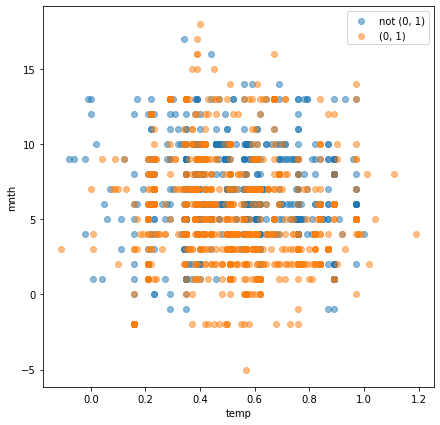

In [41]:
plot_diro2c_2d(explanation, 'temp', 'mnth')

## $(1,0)$

In [58]:
focus_class = '(1, 0)'

In [18]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 36min 41s, sys: 2min 20s, total: 39min 2s
Wall time: 12min 35s


In [59]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [60]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [68]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [69]:
feature_importances = dt_feature_importance(tree)
feature_order = np.flip(np.argsort(feature_importances))

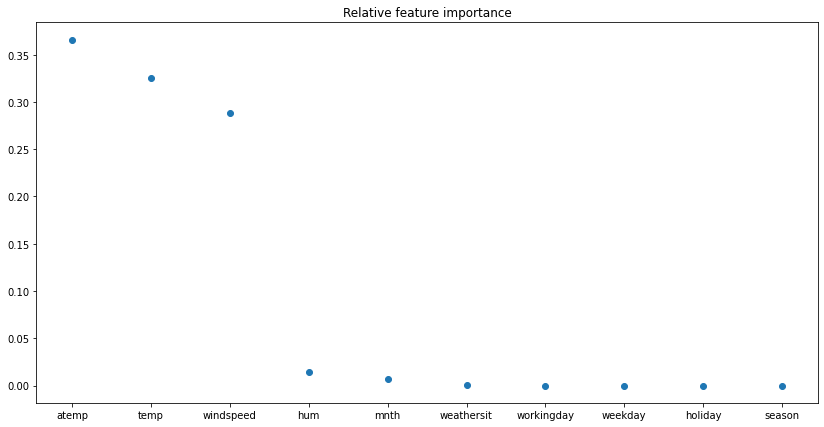

In [70]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

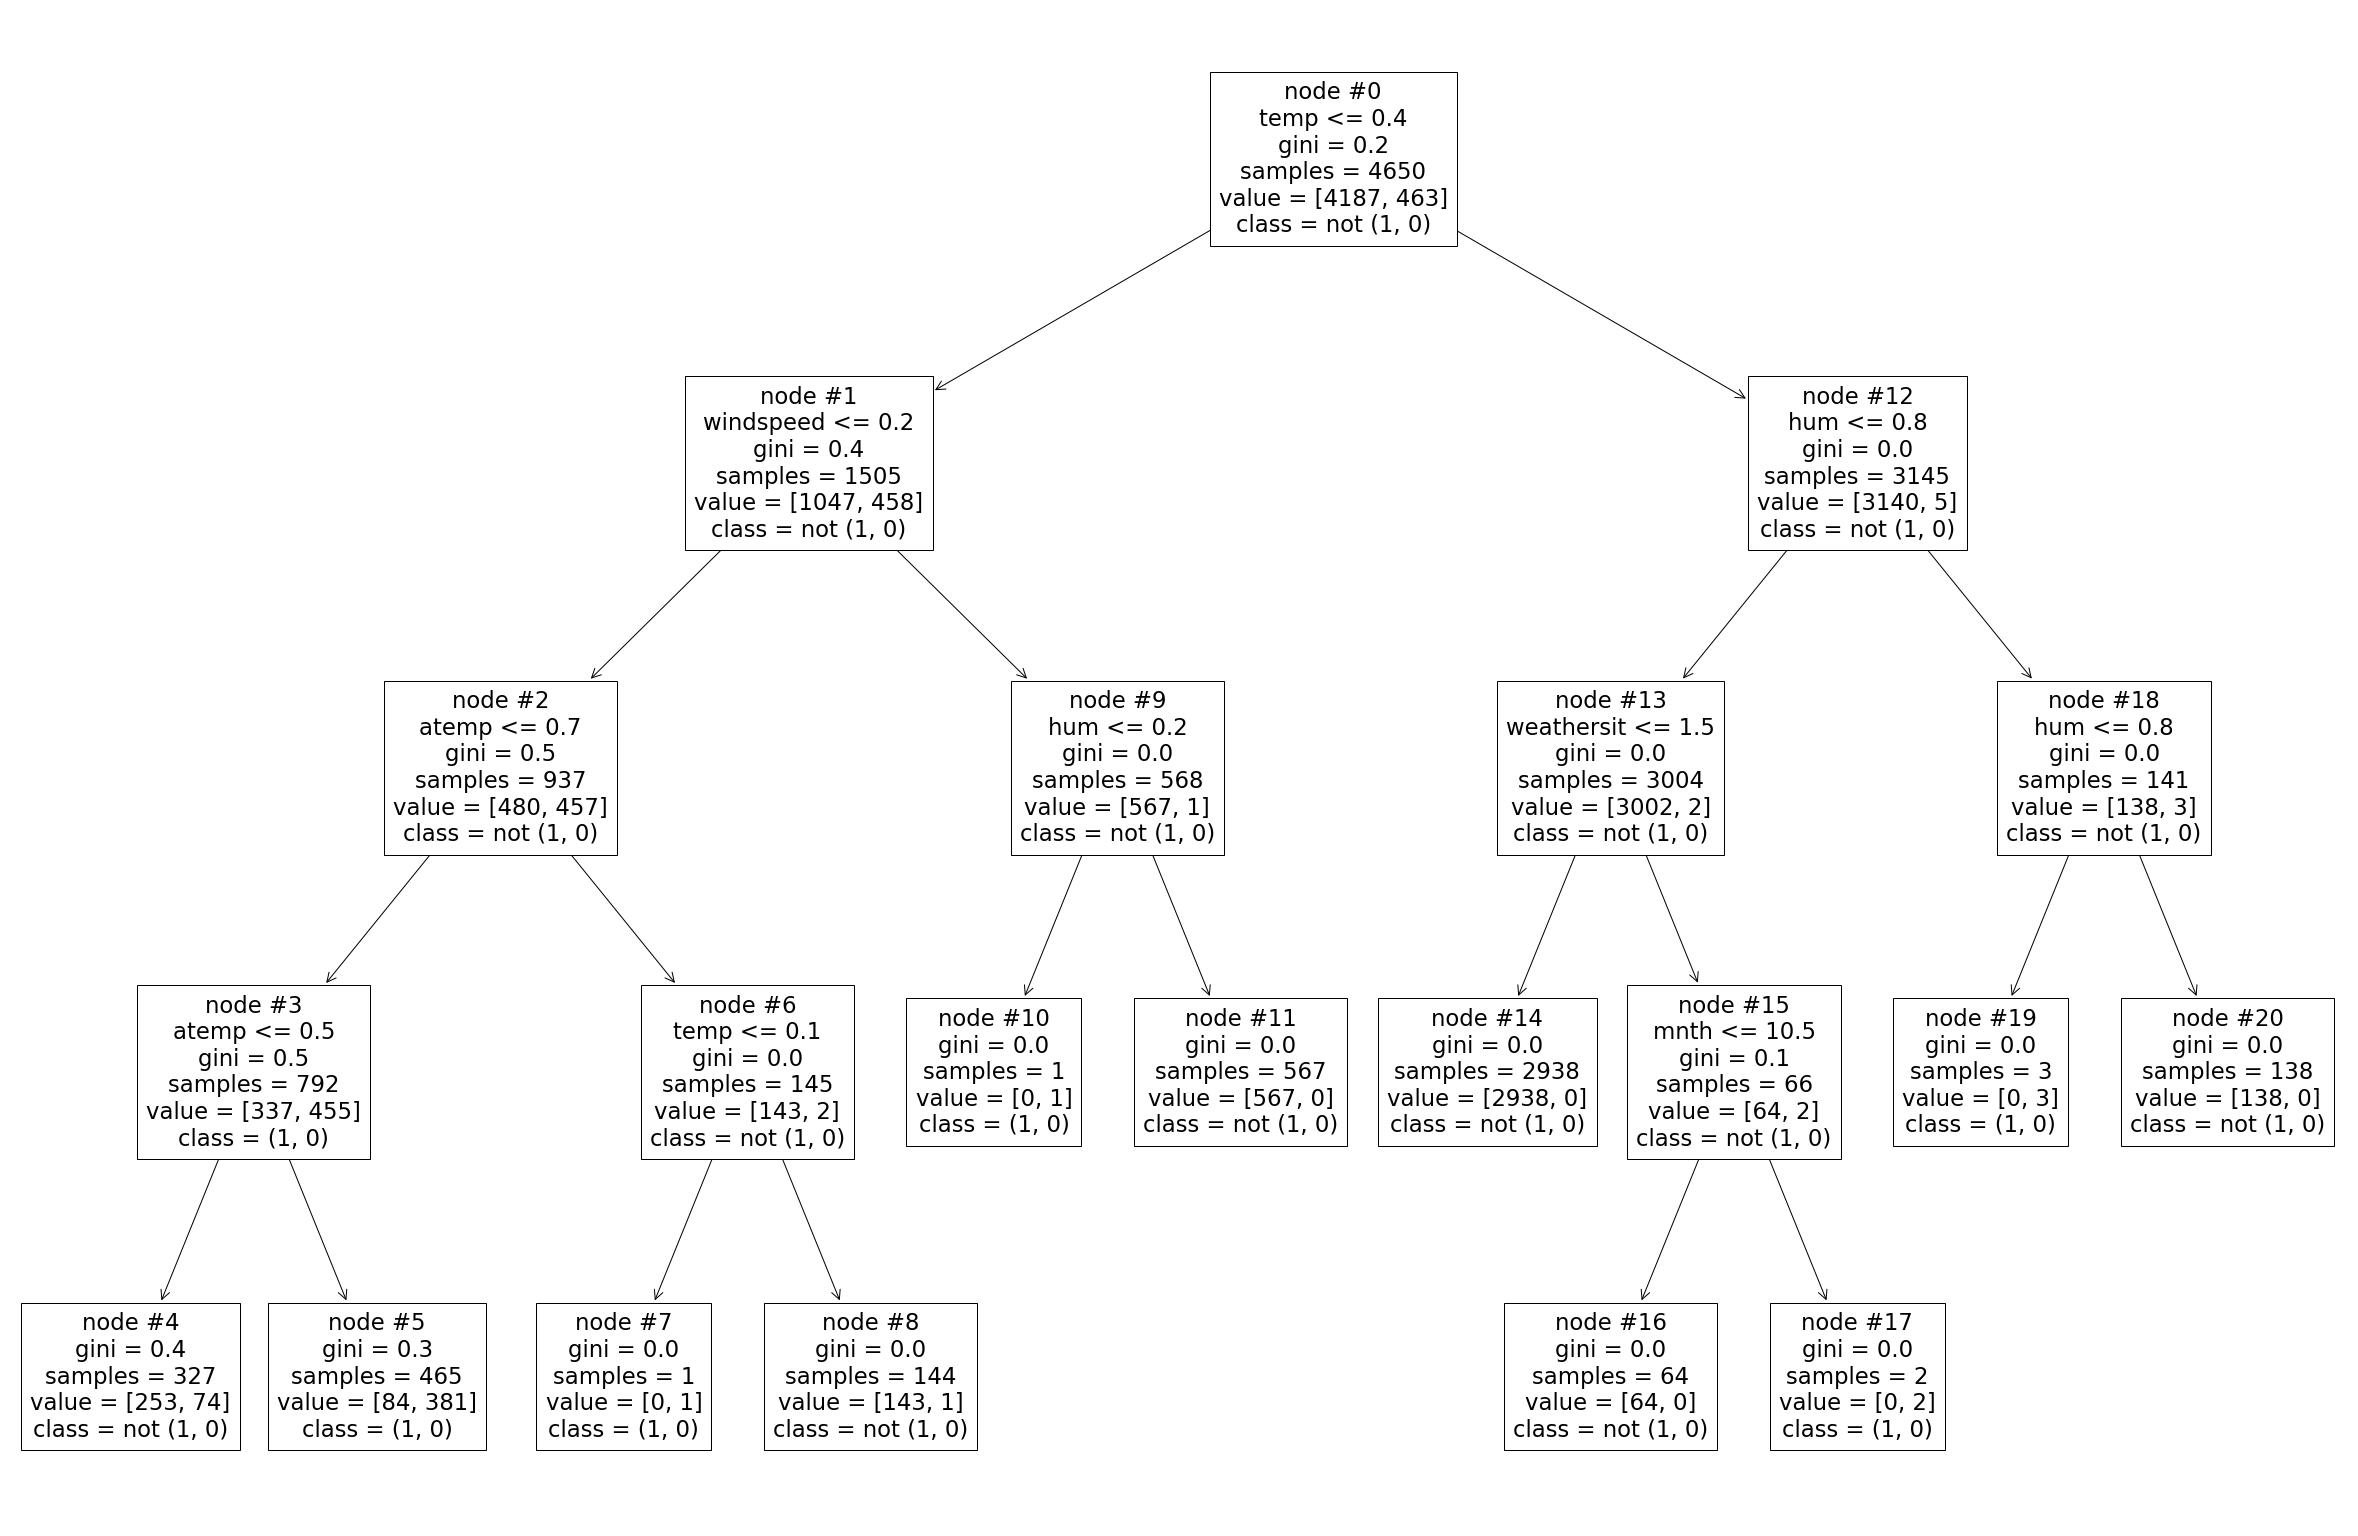

In [71]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [72]:
rules = get_rules(tree, feature_names, class_names, focus_class, feature_order)
[print(rule) for rule in rules];

node #5: if (atemp > 0.525) and (atemp <= 0.655) and (temp <= 0.405) and (windspeed <= 0.185) then class: (1, 0) (381/465 instances)
node #19: if (temp > 0.405) and (hum > 0.83) and (hum <= 0.845) then class: (1, 0) (3/3 instances)
node #17: if (temp > 0.405) and (hum <= 0.83) and (mnth > 10.5) and (weathersit > 1.5) then class: (1, 0) (2/2 instances)
node #10: if (temp <= 0.405) and (windspeed > 0.185) and (hum <= 0.21) then class: (1, 0) (1/1 instances)
node #7: if (atemp > 0.655) and (temp <= 0.1) and (windspeed <= 0.185) then class: (1, 0) (1/1 instances)


In [78]:
pd.Series(class_names[y_explain]).value_counts()

not (1, 0)    4187
(1, 0)         463
dtype: int64

The first rule applies to 381 instances classified $(1,0)$, which is the majority. 

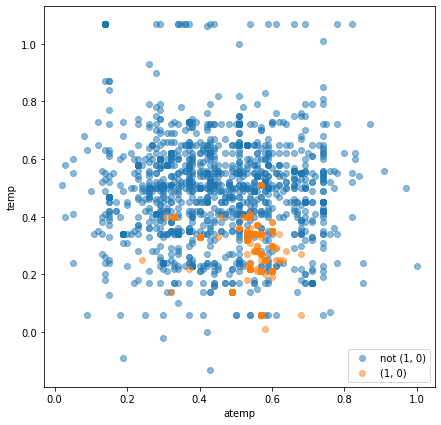

In [73]:
plot_diro2c_2d(explanation, 'atemp', 'temp')